# 5B

### Example: X is the Volume of iron in the blood, y is the percentage of the time that subjects feel cold. Blue labels are women and red labels are men.
##### Women have mean levels approximately 12% lower than men.


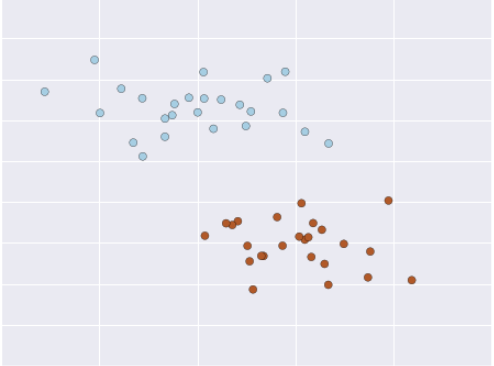


### X is altitude(m), y is average temperature, and labels are colored by population. yellow is highest and purple is lowest.

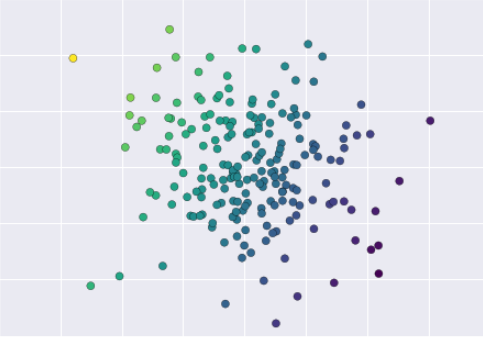

### X is distance ran, y is Heart BPM(beats per minute), and colors are different group of people with different occupations.
- Green: Marathon runner
- Blue: Swimmer
- Purple: Amateur footballer
- Yellow: Office workers with 1-3 exercises per week

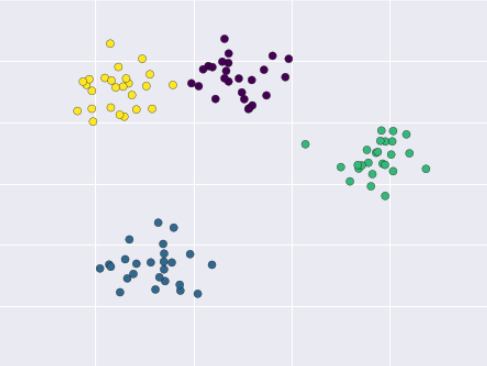

### Different measurements of oxygen level around the path of a mountain. X is longtitude, y is altitude, labels are oxygen levels. yellow is lowest purple is highest.

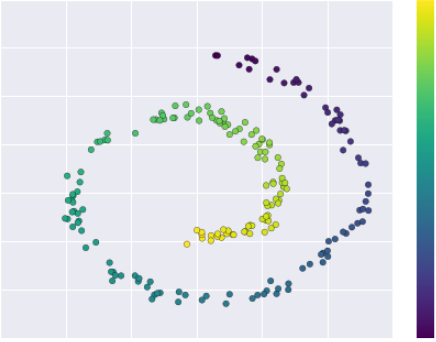

In [12]:
import seaborn as sns
import numpy as np
sns.set()
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


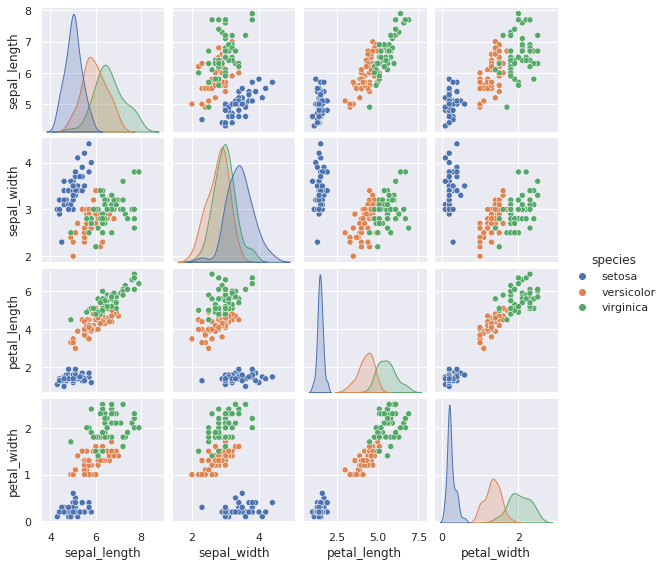

In [2]:
sns.pairplot(iris, hue='species', size=2);

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

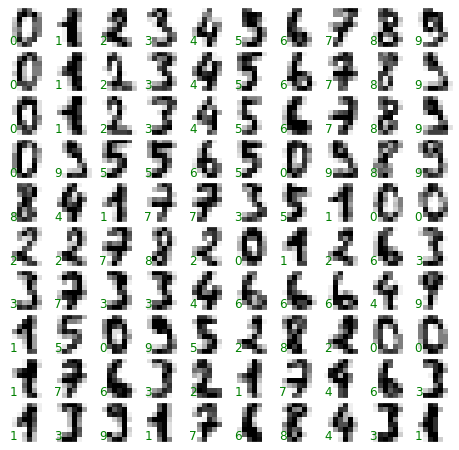

In [5]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In [6]:
X = digits.data
X.shape

(1797, 64)

In [7]:
y = digits.target
y.shape

(1797,)

In [8]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:304: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)

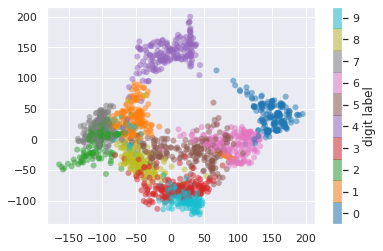

In [9]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('tab10', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

In [10]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

# 5C: Best var_smoothing value

In [13]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
# var_s = [1e-09,1e-08,1e-07,1e-06,1e-05,1e-04,1e-03,1e-02,1e-01]
var_s = np.linspace(1e-09,1e-01,20)
y = []
best_var_s = 0
best_score = 0
for i in var_s:
  model = GaussianNB(var_smoothing=i)
  model.fit(Xtrain, ytrain)
  y_model = model.predict(Xtest)
  y.append(accuracy_score(ytest, y_model))
  if accuracy_score(ytest, y_model)>best_score:
    best_var_s = i
    best_score = accuracy_score(ytest, y_model)
    
model = GaussianNB(var_smoothing=best_var_s)
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [14]:
y

[0.8333333333333334,
 0.9311111111111111,
 0.9333333333333333,
 0.9355555555555556,
 0.94,
 0.94,
 0.94,
 0.9377777777777778,
 0.9377777777777778,
 0.9355555555555556,
 0.9355555555555556,
 0.9311111111111111,
 0.9288888888888889,
 0.9288888888888889,
 0.9288888888888889,
 0.9288888888888889,
 0.9288888888888889,
 0.9288888888888889,
 0.9288888888888889,
 0.9288888888888889]

In [15]:
print(best_var_s)
print(best_score)


0.021052632368421052
0.94


In [16]:
var_s

array([1.00000000e-09, 5.26315884e-03, 1.05263167e-02, 1.57894745e-02,
       2.10526324e-02, 2.63157902e-02, 3.15789481e-02, 3.68421059e-02,
       4.21052637e-02, 4.73684216e-02, 5.26315794e-02, 5.78947373e-02,
       6.31578951e-02, 6.84210529e-02, 7.36842108e-02, 7.89473686e-02,
       8.42105265e-02, 8.94736843e-02, 9.47368422e-02, 1.00000000e-01])

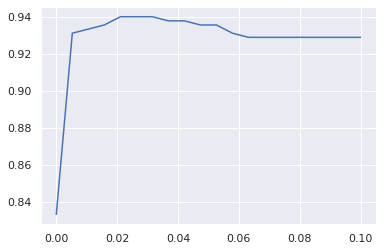

In [17]:
plt.plot(var_s,y)
plt.show()

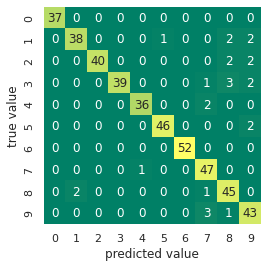

In [18]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False, cmap='summer')
plt.xlabel('predicted value')
plt.ylabel('true value');

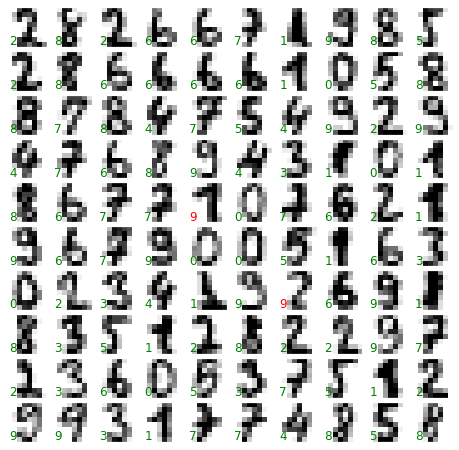

In [19]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')

# 5D: Logistic Rgression

In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)
accuracy_score(ytest,y_model)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.9511111111111111

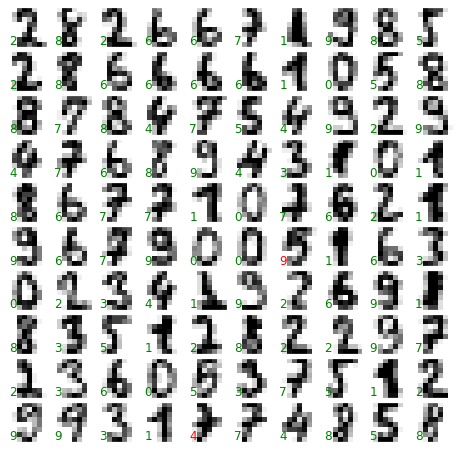

In [21]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')

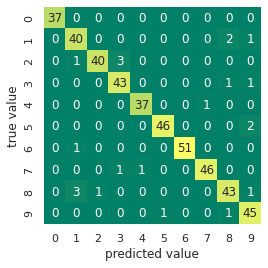

In [22]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False, cmap='summer')
plt.xlabel('predicted value')
plt.ylabel('true value');

# Decision Tree Regressor

In [23]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(criterion='absolute_error')
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)
accuracy_score(ytest,y_model)


0.8266666666666667

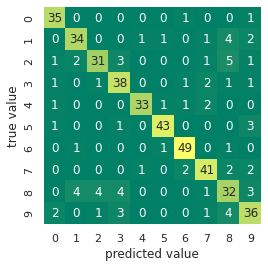

In [24]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False, cmap='summer')
plt.xlabel('predicted value')
plt.ylabel('true value');

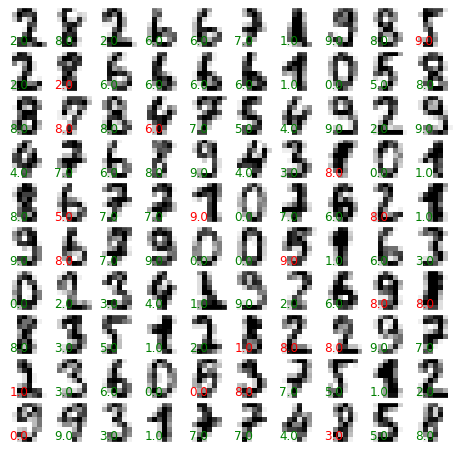

In [25]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')